# Insurance_Claim

Features Description

age : age of policyholder

sex : male(1)/female(0)

bmi : body mass index(kg / m2)

children : number of children/dependents of policyholder

smoker : smoking state nonsmoker(0)/smoker(1)

region : residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)

charges : medical cost

insuranceclaim : yes(1)/no(0)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the dataset.
df = pd.read_csv("C:/Users/HI/Downloads/insurance.csv")
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [4]:
# check the rows and columns of the data.
df.shape

(1338, 8)

In [5]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
# checking the sum of null values.

df.isnull().sum()    

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  insuranceclaim  
count  1338.000000   1338.000000     1338.000000  
mean      1.515695  13270.422265        0.585202  
std       1.104885  12110.011237        0.492871  
min       0.000000   1121.873900        0.000000  
25%       1.000000   4740.287150        0.000000  
50%       2.000000   9382.033000        1.000000  
75%       2.000000  16639.912515        1.000000  
max       3.000000  63770.428010        1.000000

In [8]:
# Map the values in the "sex" column to "female" and "male"

df['sex'] = df['sex'].map({0: 'female', 1: 'male'})
df.head()

age     sex     bmi  children  smoker  region      charges  insuranceclaim
0   19  female  27.900         0       1       3  16884.92400               1
1   18    male  33.770         1       0       2   1725.55230               1
2   28    male  33.000         3       0       2   4449.46200               0
3   33    male  22.705         0       0       1  21984.47061               0
4   32    male  28.880         0       0       1   3866.85520               1

# EDA

# Univariate Analysis

Out of 1338 , 59% people claimed insurance 


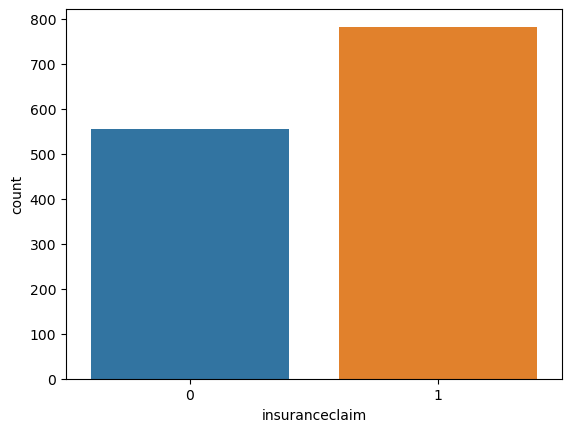

In [9]:
sns.countplot(df['insuranceclaim'])

claim_percent = round((df['insuranceclaim'].value_counts().values[0]/1338)*100)
print("Out of 1338 , {}% people claimed insurance ". format(claim_percent))

By this graph 
0 : Peoples who not claimed insurance
1: Peoples who claimed insurance

2    27.204783
3    24.289985
1    24.289985
0    24.215247
Name: region, dtype: float64


<AxesSubplot:xlabel='region', ylabel='count'>

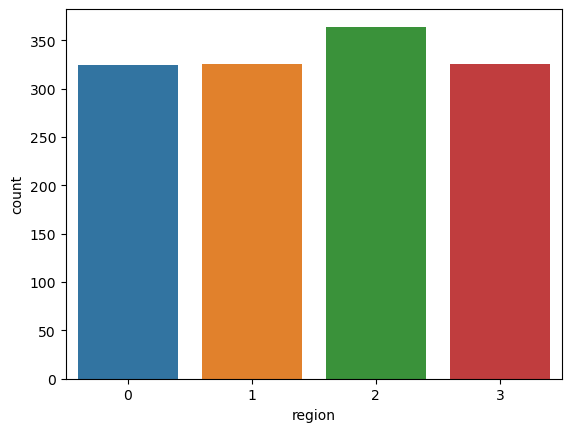

In [10]:
# peoples from different region

print((df['region'].value_counts()/1338)*100)  # we get percentage of different regions.
sns.countplot(df['region'])

0 : Northeast

1 : Northwest

2 : Southeast

3 : Southwest

male      50.523169
female    49.476831
Name: sex, dtype: float64


<AxesSubplot:xlabel='sex', ylabel='count'>

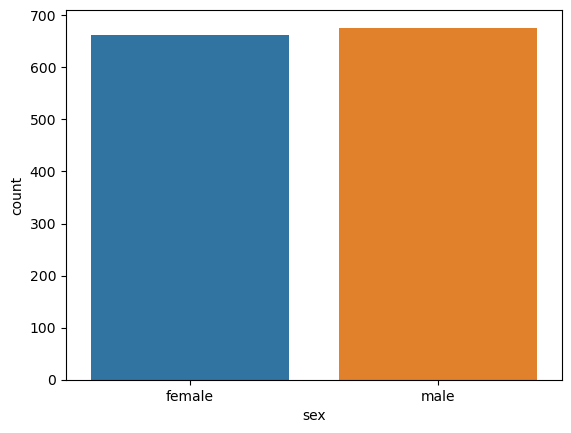

In [11]:
# gender column

print((df['sex'].value_counts()/1338)*100)   # we get percentage of gender.
sns.countplot(df['sex'])

this graph we can observe the number of male and female in this dataset

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64


<AxesSubplot:xlabel='children', ylabel='count'>

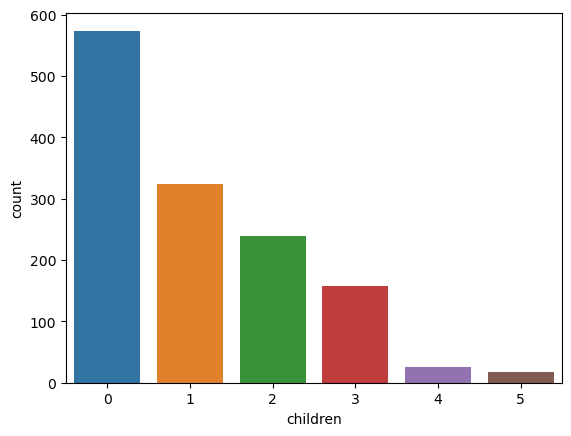

In [12]:
print((df['children'].value_counts()/1338)*100)
sns.countplot(df['children'])

With the help of graph, we observe that how many children belongs to peoples who have insurance policy.

Maximum number of peoples hold policy who have no child.

And less policy holders who more number of child.

0    79.521674
1    20.478326
Name: smoker, dtype: float64


<AxesSubplot:xlabel='smoker', ylabel='count'>

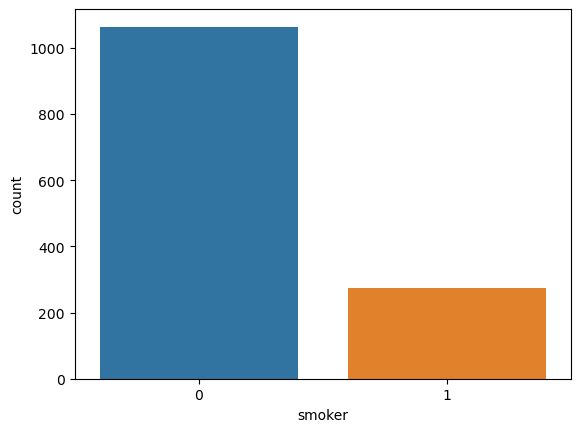

In [13]:
# counting the smoking people

print((df['smoker'].value_counts()/1338)*100)
sns.countplot(df['smoker'])

Peoples who do not smoke have more than that the people who have smoke. 0: non-smoking 1: smoking

0.05567251565299186
<bound method NDFrame._add_numeric_operations.<locals>.kurt of 0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64>


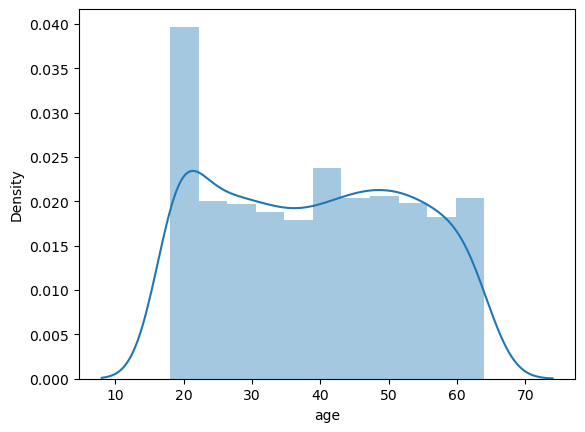

In [14]:
# age colunmn

sns.distplot(df['age'])

print(df['age'].skew())

print(df['age'].kurt)

The value printed will indicate the skewness of the 'Age' column. If the skewness is close to 0, it suggests that the distribution is approximately symmetric. A negative skewness value indicates a longer left tail, while a positive skewness value indicates a longer right tail.

Kurtosis is a measure of the shape of the distribution of values in the column, specifically focusing on the tails and outliers. If the kurtosis is close to 0, it suggests a normal distribution. Positive kurtosis indicates a distribution with heavier tails and a sharper peak, while negative kurtosis indicates a distribution with lighter tails and a flatter peak.

<AxesSubplot:xlabel='charges', ylabel='Density'>

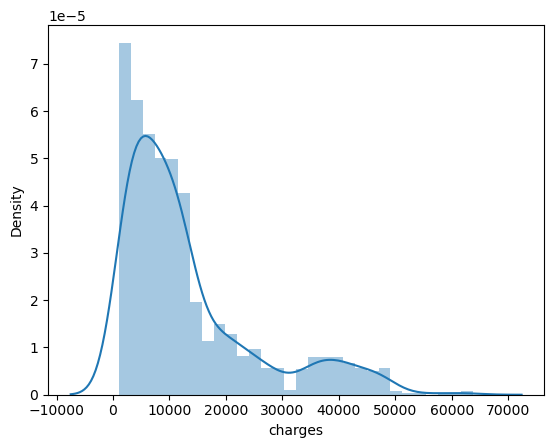

In [15]:
# charges column

sns.distplot(df['charges'])

Maximum number of people who claimed insurance for medical treetment lies between the Rs 1000 to Rs 1500

<AxesSubplot:xlabel='bmi', ylabel='Density'>

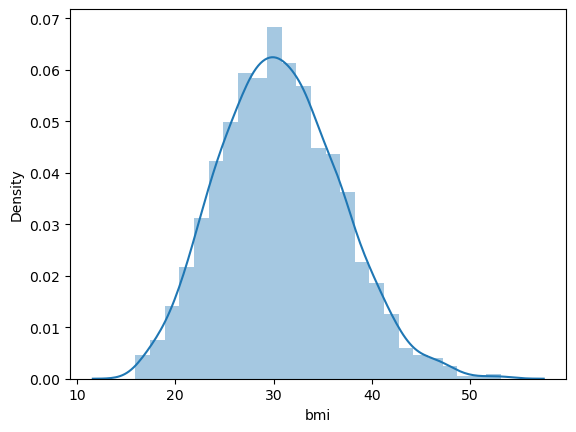

In [16]:
# bmi column

sns.distplot(df['bmi'])

People who have insurance policy lies mostly in the range of BMI 20 to BMI 40.

<AxesSubplot:xlabel='charges'>

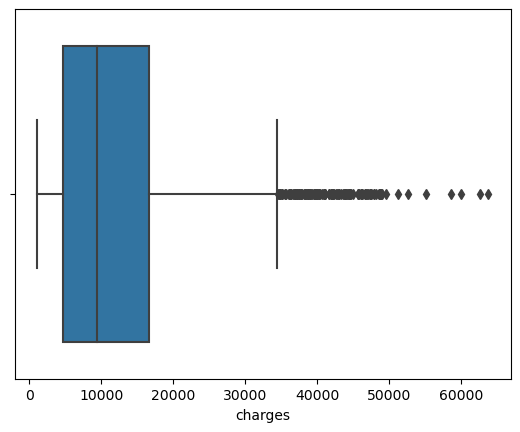

In [17]:
# chacking the outliers with the help of boxplot

sns.boxplot(df['charges'])

Outliers are there in the charge columns

<AxesSubplot:xlabel='bmi'>

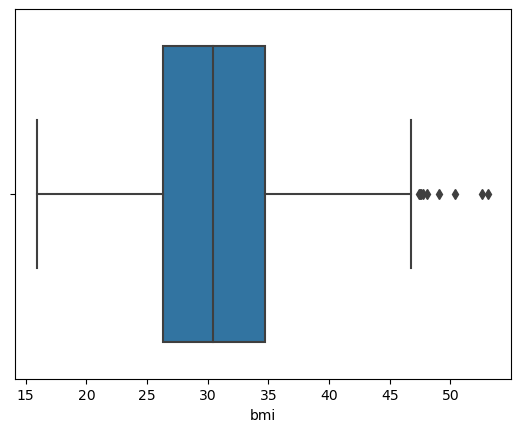

In [18]:
# chacking the outliers with the help of boxplot

sns.boxplot(df['bmi'])

In BNI columns outliers are present

# Treatment of Outliers

In [19]:
# handling outliers from 'charges' & 'bmi' column

# find IQR

Q1 = np.percentile(df[['charges', 'bmi']],25)
Q3 = np.percentile(df[['charges', 'bmi']],75)

outlier_low = Q1-1.5 * (Q3 - Q1)
outlier_high = Q1+1.5 * (Q3 - Q1)

df = df[(df['charges'] > outlier_low) & (df['charges'] < outlier_high) &
        (df['bmi'] > outlier_low) & (df['bmi'] < outlier_high)]

<AxesSubplot:xlabel='charges'>

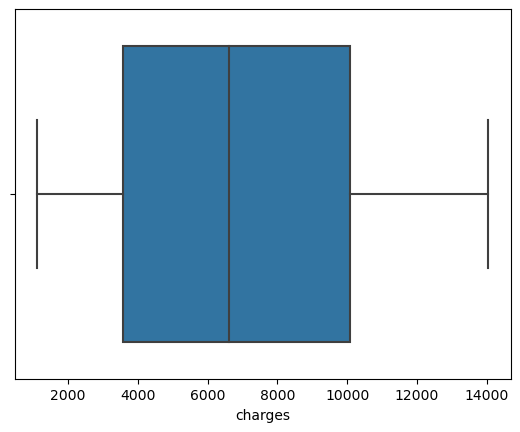

In [20]:
sns.boxplot(df['charges'])

there is no outliers lies

In [21]:
df.head()

age     sex    bmi  children  smoker  region    charges  insuranceclaim
1   18    male  33.77         1       0       2  1725.5523               1
2   28    male  33.00         3       0       2  4449.4620               0
4   32    male  28.88         0       0       1  3866.8552               1
5   31  female  25.74         0       0       2  3756.6216               0
6   46  female  33.44         1       0       2  8240.5896               1

# Multivariate Analysis

insuranceclaim     0     1
region                    
0               48.9  51.1
1               57.0  43.0
2               41.6  58.4
3               51.0  49.0

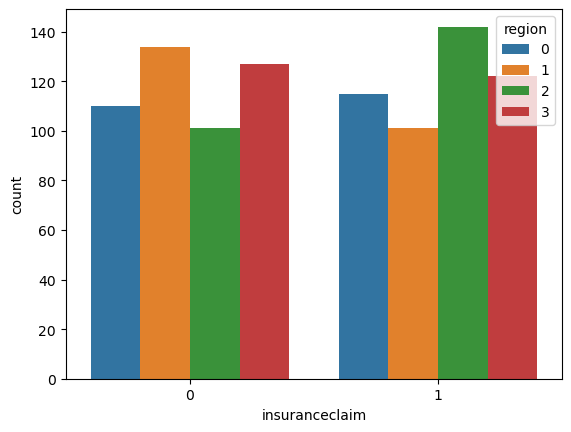

In [22]:
# insuranceclaim with region

sns.countplot(df['insuranceclaim'], hue=df['region'])
pd.crosstab(df['region'], df['insuranceclaim']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Above the table shows the percentage break with the region who claimed insurance.

0 : Northeast

1 : Northwest

2 : Southeast

3 : Southwest

insuranceclaim     0     1
sex                       
female          49.0  51.0
male            50.2  49.8

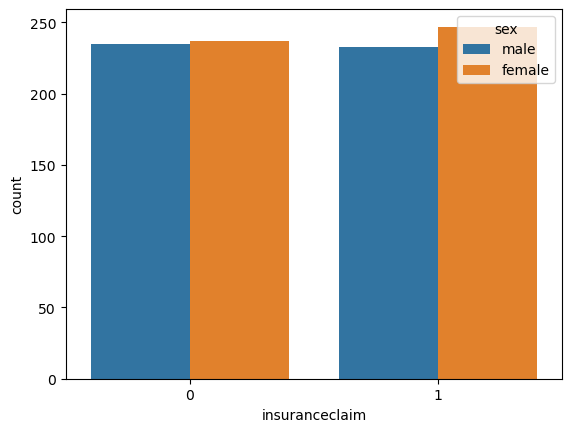

In [23]:
# insuranceclaim with sex

sns.countplot(df['insuranceclaim'], hue=df['sex'])
pd.crosstab(df['sex'], df['insuranceclaim']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Above the table shows the percentage break with the gender who claimed insurance.

And graph shows the gender wise with the number of people who claimed or not claimed insurance policy.

insuranceclaim     0     1
smoker                    
0               49.6  50.4
1               33.3  66.7

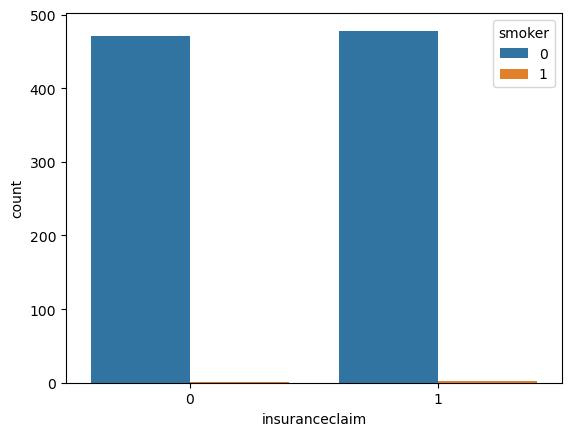

In [24]:
# insuranceclaim with smoker

sns.countplot(df['insuranceclaim'], hue=df['smoker'])
pd.crosstab(df['smoker'], df['insuranceclaim']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Above the table shows the percentage break with the smoker who claimed insurance.

And graph shows the smoker wise with the number of people who claimed or not claimed insurance policy.

insuranceclaim     0     1
children                  
0               24.2  75.8
1               57.6  42.4
2               74.2  25.8
3               86.3  13.7
4               87.5  12.5
5               81.2  18.8

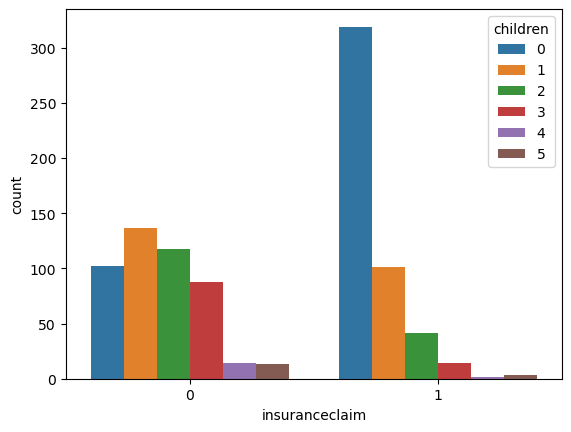

In [25]:
# insuranceclaim with children

sns.countplot(df['insuranceclaim'], hue=df['children'])
pd.crosstab(df['children'], df['insuranceclaim']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Above the table shows the percentage break with the number of childern.

In this graph, we clearly see the the people who don't claim insurance section have maximum one child.

And people who claimed maximum times insurance have no child.

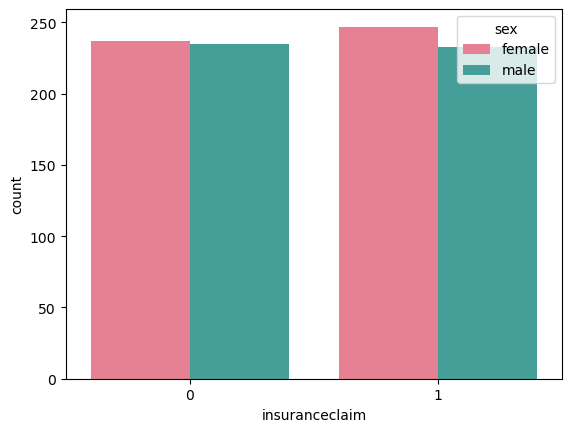

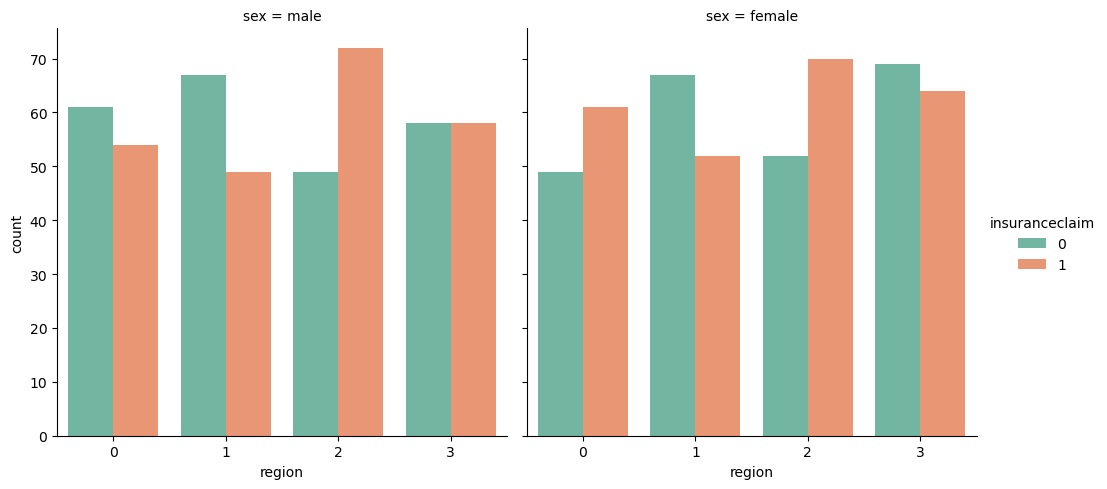

In [26]:
# Create a countplot with insurance claim, sex, and region
sns.countplot(x='insuranceclaim', hue='sex', data=df, palette='husl', hue_order=['female', 'male'])
sns.catplot(x='region', hue='insuranceclaim', col='sex', data=df, kind='count', palette='Set2')

In [27]:
# Create a pivot table with region, insurance claim, and sex
pivot_table = pd.pivot_table(df, values='insuranceclaim', index='region', columns=['sex'], aggfunc='count', fill_value=0)

# Calculate the percentage of each row
percentage = pivot_table.apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)

print(percentage)

sex     female  male
region              
0         48.9  51.1
1         50.6  49.4
2         50.2  49.8
3         53.4  46.6


In [28]:
df1 = df

In [29]:
# map the values in the 'sex' column to 0 and 1
df1['sex'] = df1['sex'].map({'female': 0, 'male': 1})
df1.head()

age  sex    bmi  children  smoker  region    charges  insuranceclaim
1   18    1  33.77         1       0       2  1725.5523               1
2   28    1  33.00         3       0       2  4449.4620               0
4   32    1  28.88         0       0       1  3866.8552               1
5   31    0  25.74         0       0       2  3756.6216               0
6   46    0  33.44         1       0       2  8240.5896               1

In [30]:
#import the libraries for prediction model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
# saprate feature and target variable

X = df1.drop("insuranceclaim", axis=1)
y = df1["insuranceclaim"]

In [34]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create an instance of the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Make predictions on the testing data

y_pred = model.predict(X_test)

# Testing

In [37]:
# Import confusion metrix

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test, y_pred)

array([[73, 30],
       [10, 78]], dtype=int64)

To understand this confusion matrix we again command below with the some specification to understand clearly.

In [46]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted No', 'Predicted Yes'], index =['Actual No', 'Actual Yes'])

Predicted No  Predicted Yes
Actual No             73             30
Actual Yes            10             78

By this 2x2 matrix, we clearly identifies our prediction.

In the 'Predicted No' column, there are 73 peoples who actually not claiming and our model also predicted that they are not claiming insurance. whereas, 10 peoples who actually claimed insurance but our model predict that they don't claim.

In 'Predicted Yes' column, there are 78 peoples who actually claiming insurance and model also predict that they claimed. whereas, 30 peoples who actually not claiming insurance but model predicts that they claimed.

In [47]:
#import classification report

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       103
           1       0.72      0.89      0.80        88

    accuracy                           0.79       191
   macro avg       0.80      0.80      0.79       191
weighted avg       0.81      0.79      0.79       191



In [50]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7905759162303665


The accuracy is 0.79,  the model correctly predicted 79% of the instances.